In [42]:
import xarray as xr
import cfgrib
import numpy as np
import matplotlib.pyplot as plt

In [34]:
FILE_PATH = '../data/gfs_4_20100808_1200_000.grb2'

In [35]:
ds_surface = xr.open_dataset(FILE_PATH, 
                             engine='cfgrib', 
                             filter_by_keys={'typeOfLevel': 'surface'})

In [36]:
print(ds_surface.info())

xarray.Dataset {
dimensions:
	latitude = 361 ;
	longitude = 720 ;

variables:
	datetime64[ns] time() ;
		time:long_name = initial time of forecast ;
		time:standard_name = forecast_reference_time ;
	timedelta64[ns] step() ;
		step:long_name = time since forecast_reference_time ;
		step:standard_name = forecast_period ;
	float64 surface() ;
		surface:long_name = original GRIB coordinate for key: level(surface) ;
		surface:units = 1 ;
	float64 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:standard_name = latitude ;
		latitude:long_name = latitude ;
		latitude:stored_direction = decreasing ;
	float64 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:standard_name = longitude ;
		longitude:long_name = longitude ;
	datetime64[ns] valid_time() ;
		valid_time:standard_name = time ;
		valid_time:long_name = time ;
	float32 sp(latitude, longitude) ;
		sp:GRIB_paramId = 134 ;
		sp:GRIB_dataType = fc ;
		sp:GRIB_numberOfPoints = 259920 ;
		sp:GRIB_typeOfLe

In [37]:
print("\nSurface Level Variables:")
print(list(ds_surface.variables))


Surface Level Variables:
['time', 'step', 'surface', 'latitude', 'longitude', 'valid_time', 'sp', 'orog', 't', 'sdwe', 'wilt', 'fldcp', 'SUNSD', 'lftx', 'cape', 'cin', '4lftx', 'unknown', 'gust', 'lsm', 'siconc']


In [38]:
# Let's also list all available variables at each level type
print("\nExploring all level types:")
for level_type in [
    'surface',
    'isobaricInhPa',
    'heightAboveGround',
    'atmosphereSingleLayer'
]:
    try:
        ds = xr.open_dataset(FILE_PATH,
                            engine='cfgrib',
                            filter_by_keys={'typeOfLevel': level_type})
        print(f"\nLevel type: {level_type}")
        print("Variables:", list(ds.variables))
    except Exception as e:
        print(f"Could not load {level_type} data:", e)

skipping variable: paramId==157 shortName='r'
Traceback (most recent call last):
  File "/Users/aidanwiteck/miniconda3/envs/wind-fm/lib/python3.10/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/aidanwiteck/miniconda3/envs/wind-fm/lib/python3.10/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        200.,  150.,  100.,   70.,   50.,   30.,   20.,   10.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        200.,  150.,  100.,   70.,   50.,   3


Exploring all level types:

Level type: surface
Variables: ['time', 'step', 'surface', 'latitude', 'longitude', 'valid_time', 'sp', 'orog', 't', 'sdwe', 'wilt', 'fldcp', 'SUNSD', 'lftx', 'cape', 'cin', '4lftx', 'unknown', 'gust', 'lsm', 'siconc']

Level type: isobaricInhPa
Variables: ['time', 'step', 'isobaricInhPa', 'latitude', 'longitude', 'valid_time', 'gh', 't', 'u', 'v', 'absv']

Level type: heightAboveGround
Variables: ['time', 'step', 'heightAboveGround', 'latitude', 'longitude', 'valid_time', 't2m', 'sh2', 'r2']

Level type: atmosphereSingleLayer
Variables: ['time', 'step', 'atmosphereSingleLayer', 'latitude', 'longitude', 'valid_time', 'pwat', 'cwat', 'r', 'tozne']


In [39]:
ds = xr.open_dataset(FILE_PATH, 
                             engine='cfgrib', 
                             filter_by_keys={'typeOfLevel': 'isobaricInhPa'})

skipping variable: paramId==157 shortName='r'
Traceback (most recent call last):
  File "/Users/aidanwiteck/miniconda3/envs/wind-fm/lib/python3.10/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/aidanwiteck/miniconda3/envs/wind-fm/lib/python3.10/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        200.,  150.,  100.,   70.,   50.,   30.,   20.,   10.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        200.,  150.,  100.,   70.,   50.,   3

In [40]:
print("\nWind Components Info:")
print("\nU wind:")
print(ds['u'].attrs)
print("\nV wind:")
print(ds['v'].attrs)


Wind Components Info:

U wind:
{'GRIB_paramId': 131, 'GRIB_dataType': 'fc', 'GRIB_numberOfPoints': 259920, 'GRIB_typeOfLevel': 'isobaricInhPa', 'GRIB_stepUnits': 1, 'GRIB_stepType': 'instant', 'GRIB_gridType': 'regular_ll', 'GRIB_uvRelativeToGrid': 0, 'GRIB_NV': 0, 'GRIB_Nx': 720, 'GRIB_Ny': 361, 'GRIB_cfName': 'eastward_wind', 'GRIB_cfVarName': 'u', 'GRIB_gridDefinitionDescription': 'Latitude/longitude. Also called equidistant cylindrical, or Plate Carree', 'GRIB_iDirectionIncrementInDegrees': 0.5, 'GRIB_iScansNegatively': 0, 'GRIB_jDirectionIncrementInDegrees': 0.5, 'GRIB_jPointsAreConsecutive': 0, 'GRIB_jScansPositively': 0, 'GRIB_latitudeOfFirstGridPointInDegrees': 90.0, 'GRIB_latitudeOfLastGridPointInDegrees': -90.0, 'GRIB_longitudeOfFirstGridPointInDegrees': 0.0, 'GRIB_longitudeOfLastGridPointInDegrees': 359.5, 'GRIB_missingValue': 3.4028234663852886e+38, 'GRIB_name': 'U component of wind', 'GRIB_shortName': 'u', 'GRIB_units': 'm s**-1', 'long_name': 'U component of wind', 'unit

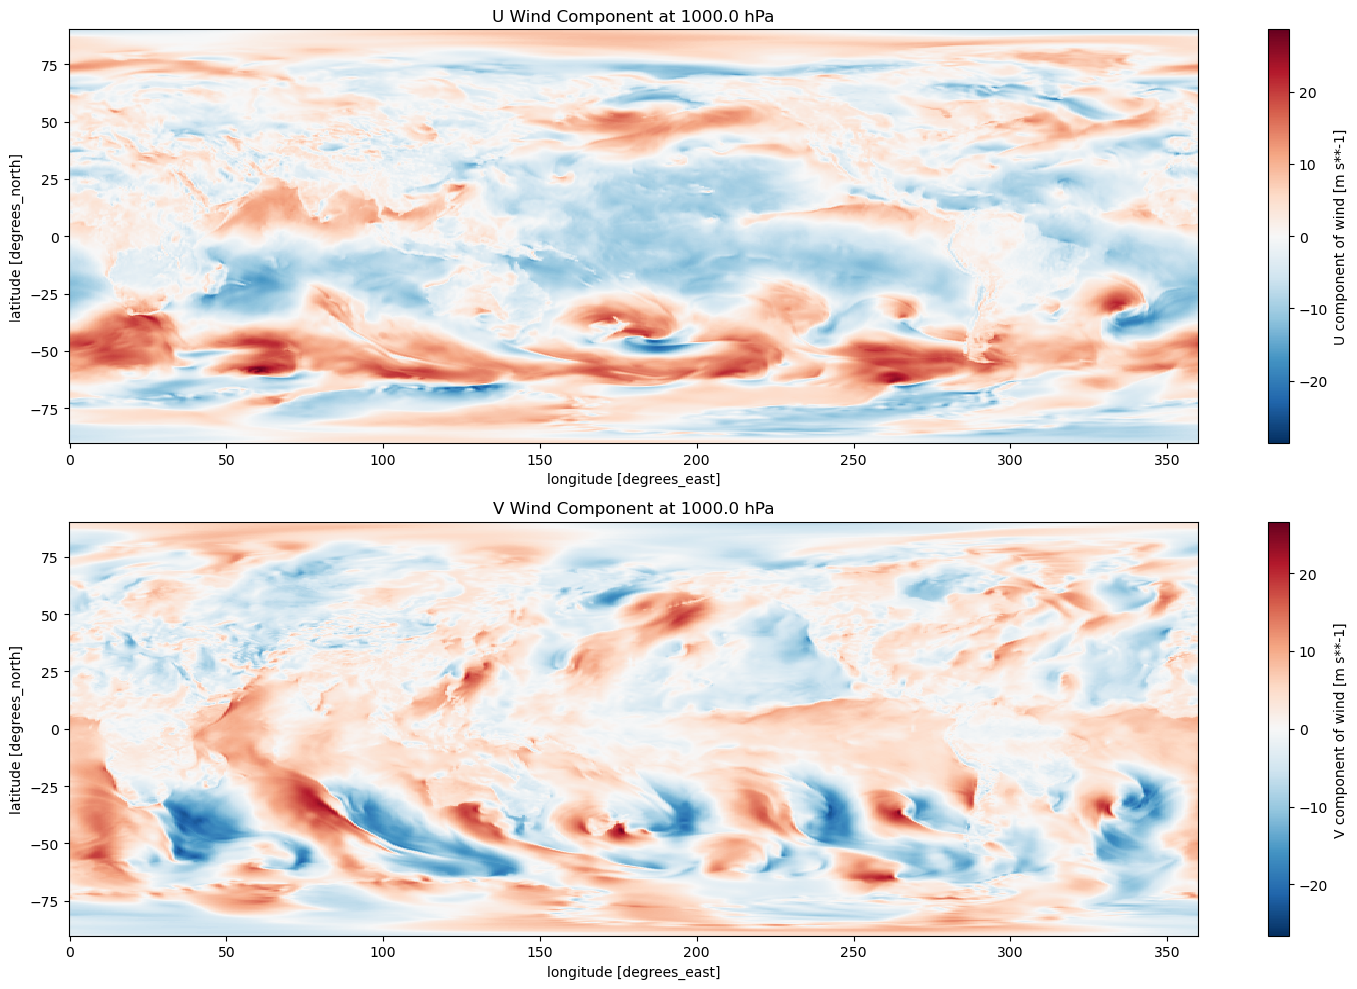

In [41]:
level = ds.isobaricInhPa.values[0]  # Using first available level

plt.figure(figsize=(15, 10))
plt.subplot(211)
u_wind = ds['u'].sel(isobaricInhPa=level).squeeze()
u_wind.plot()
plt.title(f'U Wind Component at {level} hPa')

# Plot V component
plt.subplot(212)
v_wind = ds['v'].sel(isobaricInhPa=level).squeeze()
v_wind.plot()
plt.title(f'V Wind Component at {level} hPa')

plt.tight_layout()
plt.show()

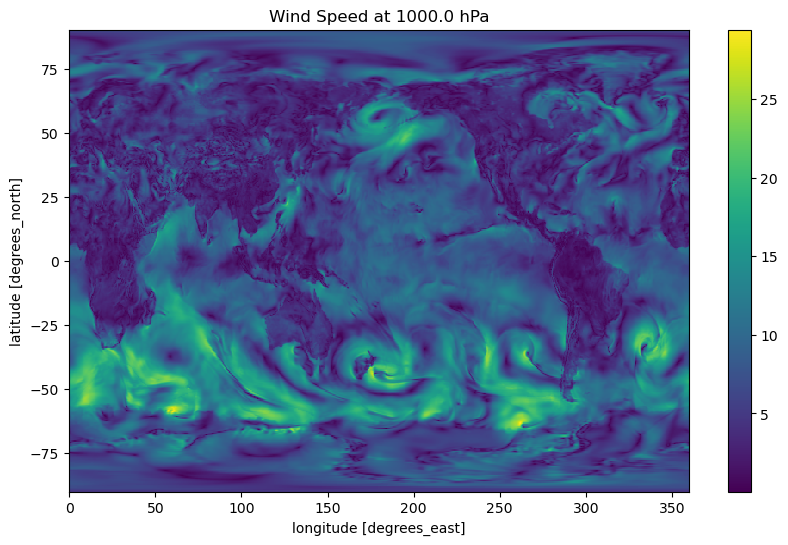

In [43]:
wind_speed = np.sqrt(u_wind**2 + v_wind**2)

plt.figure(figsize=(10, 6))
wind_speed.plot()
plt.title(f'Wind Speed at {level} hPa')
plt.show()

In [44]:
# Print grid information
print("\nGrid Information:")
print("Latitude range:", float(ds.latitude.min()), "to", float(ds.latitude.max()))
print("Longitude range:", float(ds.longitude.min()), "to", float(ds.longitude.max()))
print("Latitude points:", len(ds.latitude))
print("Longitude points:", len(ds.longitude))


Grid Information:
Latitude range: -90.0 to 90.0
Longitude range: 0.0 to 359.5
Latitude points: 361
Longitude points: 720


In [45]:
# Get wind components at this level
u_wind = ds['u'].sel(isobaricInhPa=level).squeeze()
v_wind = ds['v'].sel(isobaricInhPa=level).squeeze()

In [46]:
u_wind

<xarray.DataArray 'u' (latitude: 361, longitude: 720)> Size: 1MB
[259920 values with dtype=float32]
Coordinates:
    time           datetime64[ns] 8B ...
    step           timedelta64[ns] 8B ...
    isobaricInhPa  float64 8B 1e+03
  * latitude       (latitude) float64 3kB 90.0 89.5 89.0 ... -89.0 -89.5 -90.0
  * longitude      (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
    valid_time     datetime64[ns] 8B ...
Attributes: (12/30)
    GRIB_paramId:                             131
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      259920
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                U component of wind
    GRIB_shortName:                           u
    GRIB_units:                               m s**-1
    long_name:                                U component of wind
    units:                                    m s**-1
    standard_name:                            eastward_wind

In [29]:
# Create a grid for plotting
lons = ds.longitude.values
lats = ds.latitude.values
lon_mesh, lat_mesh = np.meshgrid(lons, lats)

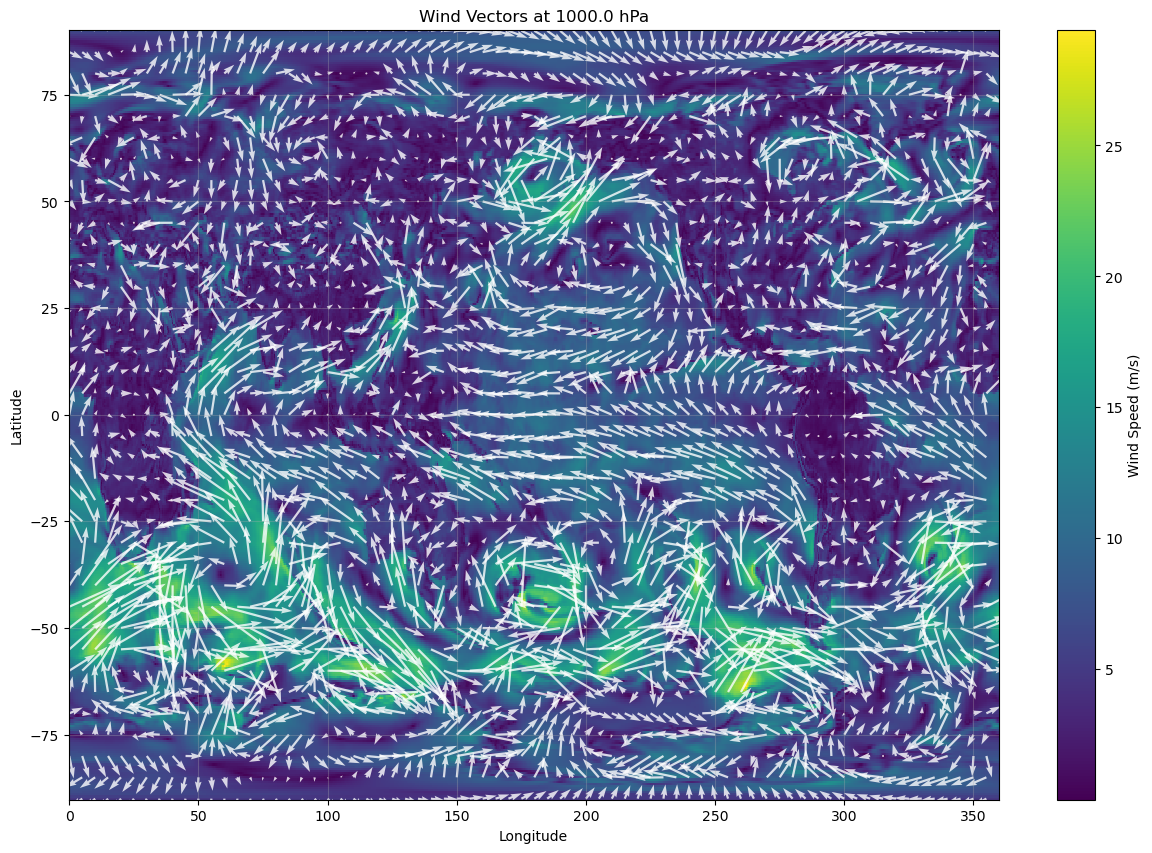

In [31]:
# Downsample for clearer vectors (adjust stride as needed)
stride = 10 # Increase this number to show fewer vectors

plt.figure(figsize=(15, 10))

# Calculate wind speed for coloring
wind_speed = np.sqrt(u_wind**2 + v_wind**2)

# Create a color map of wind speed
plt.pcolormesh(lon_mesh, lat_mesh, wind_speed, 
               shading='auto',
               cmap='viridis')
plt.colorbar(label='Wind Speed (m/s)')

# Plot wind vectors
plt.quiver(lon_mesh[::stride, ::stride],
           lat_mesh[::stride, ::stride],
           u_wind[::stride, ::stride],
           v_wind[::stride, ::stride],
           scale=300,  # Adjust this to change arrow size
           color='white',
           alpha=0.8)

plt.title(f'Wind Vectors at {level} hPa')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add gridlines
plt.grid(True, alpha=0.3)

plt.show()

In [32]:
# Print some stats about the wind field
print(f"\nWind field statistics at {level} hPa:")
print(f"Maximum wind speed: {float(wind_speed.max()):.2f} m/s")
print(f"Mean wind speed: {float(wind_speed.mean()):.2f} m/s")
print(f"Grid resolution: {float(lons[1] - lons[0]):.2f}° longitude x {float(lats[1] - lats[0]):.2f}° latitude")


Wind field statistics at 1000.0 hPa:
Maximum wind speed: 29.42 m/s
Mean wind speed: 7.45 m/s
Grid resolution: 0.50° longitude x -0.50° latitude


In [47]:
(-5)%360

355